In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from caveclient import CAVEclient
client = CAVEclient('minnie65_phase3_v1')
from datetime import datetime, timezone

In [52]:
settime = datetime(2022, 9, 20, 4, 0, 0, 0, tzinfo=timezone.utc)
df_ids_pred_met = pd.read_csv("EM_MC_Predicted_MET_Labels_11_18_22_v1_gr55prob.csv")
pre_id_mc = df_ids_pred_met["id"]
print (df_ids_pred_met)

    Unnamed: 0                  id predicted_MET-type Label  probability Area
0            0  864691135013417622                Sst-MET-4        1.000   V1
1            8  864691135467660940                Sst-MET-4        1.000   V1
2           11  864691135699487522                Sst-MET-8        1.000   V1
3           14  864691135925834510                Sst-MET-8        1.000   V1
4           19  864691136118647832                Sst-MET-4        1.000   V1
5            9  864691135544588584                Sst-MET-8        0.998   V1
6           10  864691135577202181                Sst-MET-4        0.998   V1
7            6  864691135374222153                Sst-MET-6        0.996   V1
8           18  864691136116457636                Sst-MET-6        0.996   V1
9            1  864691135058985115                Sst-MET-6        0.994   V1
10          12  864691135754152141                Sst-MET-5        0.990   V1
11          16  864691135988665856                Sst-MET-6     

In [53]:
df2 = client.materialize.synapse_query(pre_ids= pre_id_mc, timestamp = settime)
print (df2.head())
md3 = client.materialize.query_table('allen_subclass_type_svm_v0', timestamp = settime)
# dfm = pd.merge(df2, md3, left_on = 'post_pt_root_id', right_on ='pt_root_id', how = 'right')
soma_counts = md3['pt_root_id'].value_counts().rename_axis('pt_root_id').reset_index(name ='no_of_somas')
singlesomas = soma_counts.loc[soma_counts['no_of_somas'] == 1]
single_soma_merge = pd.merge(md3, singlesomas, left_on = 'pt_root_id', right_on = 'pt_root_id', how = 'inner')
dfm_somas = pd.merge(df2, single_soma_merge, left_on = 'post_pt_root_id', right_on = 'pt_root_id', how = 'inner')


          id valid  pre_pt_supervoxel_id      pre_pt_root_id  \
3  176798180     t     90302341240276189  864691135058985115   
4  212519870     t     93667052576919349  864691135013417622   
5  265888405     t     97898730174742508  864691135341516741   
7  251465179     t     96555400500931811  864691135013417622   
9  320698668     t    102401573552128667  864691135341516741   

   post_pt_supervoxel_id     post_pt_root_id  size          pre_pt_position  \
3      90302341240286621  864691135337958630   612  [185518, 204180, 22681]   
4      93667052576920238  864691135941108852  2476  [210306, 107362, 19496]   
5      97828361430566276  864691135584451570  8260  [240696, 178738, 27009]   
7      96555469220403416  864691135544554024  2616  [231298, 131742, 16403]   
9     102401573552128687  864691136209044412  5668  [273514, 172816, 24266]   

          post_pt_position          ctr_pt_position  
3  [185478, 204194, 22689]  [185544, 204164, 22684]  
4  [210398, 107482, 19498]  [210

In [54]:
all_somas = client.materialize.query_table('nucleus_neuron_svm', timestamp = settime)
print (all_somas.head())
print (all_somas.shape)
all_neurons = all_somas.loc[all_somas['cell_type'] == 'neuron']
print (all_neurons.head())
print (all_neurons.shape)

    id valid classification_system   cell_type  pt_supervoxel_id  pt_root_id  \
0    1     t             is_neuron  not-neuron                 0           0   
1   33     t             is_neuron  not-neuron                 0           0   
2  133     t             is_neuron  not-neuron                 0           0   
3  146     t             is_neuron  not-neuron                 0           0   
4  162     t             is_neuron  not-neuron                 0           0   

             pt_position  
0  [60800, 76912, 19819]  
1  [56320, 77200, 23870]  
2  [62064, 89392, 19385]  
3  [62400, 90528, 19403]  
4  [63392, 86368, 19399]  
(171815, 7)
       id valid classification_system cell_type  pt_supervoxel_id  pt_root_id  \
87   1841     t             is_neuron    neuron                 0           0   
92   1896     t             is_neuron    neuron                 0           0   
99   2005     t             is_neuron    neuron                 0           0   
102  2020     t      

In [55]:
54159/68467

0.7910234127389837

In [56]:
multisomas = soma_counts.loc[soma_counts['no_of_somas'] != 1]
multi_soma_merge = pd.merge(md3, multisomas, left_on = 'pt_root_id', right_on = 'pt_root_id', how = 'inner')
dfm_multisomas = pd.merge(df2, multi_soma_merge, left_on = 'post_pt_root_id', right_on = 'pt_root_id', how = 'inner')

In [58]:
# ###MET avg histo target vs non-target
# ### first column
# binmin = 0
# binmax = 500
# binstep = 10

# new_non= np.zeros(49, int)
# new_total = np.zeros(49, int)
# new_target= np.zeros(49, int)
# new_prob = np.zeros(49, int)
# zeros = np.zeros(49, int)


# ###get IDs for each predicted MET-type
# met8_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-8"]
# met8_id = met8_pred["id"]

# met4_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-4"]
# met4_id = met4_pred["id"]

# met6_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-6"]
# met6_id = met6_pred["id"]

# metid = met6_id
# ##calculate number of cells in dataset that are both targets and non-targets of each predicted MET-type
# for i in metid:
#     print (i)
#     ###filtered out cells with >1 soma from dataset, now group INH and L6 cell types
#     single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
#     single_cell['cell_type'] = single_cell['cell_type'].str.replace('BC','INH')
#     single_cell['cell_type'] = single_cell['cell_type'].str.replace('MC','INH')
#     single_cell['cell_type'] = single_cell['cell_type'].str.replace('NGC','INH')
#     single_cell['cell_type'] = single_cell['cell_type'].str.replace('BPC','INH')
#     single_cell['cell_type'] = single_cell['cell_type'].str.replace('6P-CT','6P')
#     single_cell['cell_type'] = single_cell['cell_type'].str.replace('6P-IT','6P')
    
#     ###find every cell that is a postsynaptic target of presynaptic MC by looking at synapses, remove duplicates
#     single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas"]]
#     converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
#     converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
#     converge_call = converge_call.drop_duplicates()
#     sorted_converge = converge_call.sort_values(["counts"], ascending = False)

#     ####find soma locations for all cells in the dataset
#     md3_sub = md3[["pt_root_id","pt_position", "cell_type"]]
    
#     #### merge list of synapse receiving cells with larger dataset to find soma locations of each target cell
#     merge_targets = pd.merge(converge_call, md3_sub, left_on = 'post_pt_root_id', right_on = 'pt_root_id', how = 'outer', indicator = True)
#     merge_targets['cell_type_y'] = merge_targets['cell_type_y'].str.replace('BC','INH')
#     merge_targets['cell_type_y'] = merge_targets['cell_type_y'].str.replace('MC','INH')
#     merge_targets['cell_type_y'] = merge_targets['cell_type_y'].str.replace('NGC','INH')
#     merge_targets['cell_type_y'] = merge_targets['cell_type_y'].str.replace('BPC','INH')
#     merge_targets['cell_type_y'] = merge_targets['cell_type_y'].str.replace('6P-CT','6P')
#     merge_targets['cell_type_y'] = merge_targets['cell_type_y'].str.replace('6P-IT','6P')

#     ### create list of cells that do not receive synapses (aka non-targets)
#     non_target = merge_targets.loc[merge_targets['_merge'] == "right_only"].copy()
#     ### take a subset of the datafram to only include soma location and cell type
#     non_target_sub = non_target[["pt_root_id","pt_position", "cell_type_y"]].copy()

#     ### get soma location of presynaptic MCs 
#     pre_location = md3.loc[md3['pt_root_id'] == i]

#     pre_location = pre_location[["pt_root_id", "pt_position"]]
#     pre_location = pre_location.rename(columns = {"pt_position": "pre_pt_position"})
#     ### merge presynaptic soma location table with postsynaptic soma location table
#     converge_pre = pd.merge(pre_location, converge_call, left_on = 'pt_root_id', right_on = 'pre_pt_root_id', how = 'inner')

#     ### extract soma location of all target cells
#     post_soma = single_cell[["post_pt_root_id", "pt_position"]]
#     post_soma = post_soma.rename(columns = {'pt_position': 'post_pt_position'})
#     post_soma = post_soma.drop_duplicates(subset = 'post_pt_root_id')
#     converge_pre_post = pd.merge(converge_pre, post_soma, on = 'post_pt_root_id', how = 'inner')

#     ###convert presynaptic and postsynaptic soma coordinates from pixel to um space
#     converge_pre_post['pre_x'] = converge_pre_post['pre_pt_position'].map(lambda x: x[0])
#     converge_pre_post['pre_x'] = converge_pre_post['pre_x']*.004
#     converge_pre_post['pre_y'] = converge_pre_post['pre_pt_position'].map(lambda x: x[1])
#     converge_pre_post['pre_y'] = converge_pre_post['pre_y']*.004
#     converge_pre_post['pre_z'] = converge_pre_post['pre_pt_position'].map(lambda x: x[2])
#     converge_pre_post['pre_z'] = converge_pre_post['pre_z']*.04
#     converge_pre_post['post_x'] = converge_pre_post['post_pt_position'].map(lambda x: x[0])
#     converge_pre_post['post_x'] = converge_pre_post['post_x']*.004
#     converge_pre_post['post_y'] = converge_pre_post['post_pt_position'].map(lambda x: x[1])
#     converge_pre_post['post_y'] = converge_pre_post['post_y']*.004
#     converge_pre_post['post_z'] = converge_pre_post['post_pt_position'].map(lambda x: x[2])
#     converge_pre_post['post_z'] = converge_pre_post['post_z']*.04
    
#     ##calc various distance metrics between somas
#     converge_pre_post['distance'] = np.sqrt((converge_pre_post['pre_x']-converge_pre_post['post_x'])**2 + (converge_pre_post['pre_y']-converge_pre_post['post_y'])**2 + (converge_pre_post['pre_z']-converge_pre_post['post_z'])**2)
#     converge_pre_post['y_offset'] = np.absolute((converge_pre_post['pre_y']-converge_pre_post['post_y']))
#     converge_pre_post['radius'] = np.sqrt((converge_pre_post['pre_x']-converge_pre_post['post_x'])**2 + (converge_pre_post['pre_y']-converge_pre_post['post_y'])**2)
#     converge_pre_post['z_offset'] = np.asarray((converge_pre_post['pre_z']-converge_pre_post['post_z']))
      

#     ###grab single row so I can get coordinates of presynaptic cell soma for math
#     single_pre = converge_pre_post.iloc[[0]]
#     soma_x = single_pre['pre_x'].max()
#     soma_y = single_pre['pre_y'].max()
#     soma_z = single_pre['pre_z'].max()

#     ### convert original MC and non-target soma coordinates from pixel to um space
#     non_target_sub['pre_x'] = non_target_sub['pt_position'].map(lambda x: x[0])
#     non_target_sub['pre_x'] = non_target_sub['pre_x']*.004
#     non_target_sub['pre_y'] = non_target_sub['pt_position'].map(lambda x: x[1])
#     non_target_sub['pre_y'] = non_target_sub['pre_y']*.004
#     non_target_sub['pre_z'] = non_target_sub['pt_position'].map(lambda x: x[2])
#     non_target_sub['pre_z'] = non_target_sub['pre_z']*.04
#     non_target_sub['i_soma_x'] = soma_x
#     non_target_sub['i_soma_y'] = soma_y
#     non_target_sub['i_soma_z'] = soma_z
#     non_target_sub['counts'] = 0
#     ##calc various distance metrics between presynaptic cell and non-target somas
#     non_target_sub['distance'] = np.sqrt((non_target_sub['i_soma_x']-non_target_sub['pre_x'])**2 + (non_target_sub['i_soma_y']-non_target_sub['pre_y'])**2 + (non_target_sub['i_soma_z']-non_target_sub['pre_z'])**2)
#     non_target_sub['y_offset'] = np.absolute((non_target_sub['i_soma_y']-non_target_sub['pre_y']))
#     non_target_sub['radius'] = np.sqrt((non_target_sub['i_soma_x']-non_target_sub['pre_x'])**2 + (non_target_sub['i_soma_y']-non_target_sub['pre_y'])**2)
#     non_target_sub['z_offset'] = np.asarray((non_target_sub['i_soma_z']-non_target_sub['pre_z']))
#     print ('non_target', non_target_sub.head())

#     ###flip y coordinate because database has axis inverted to anatomy
#     converge_pre_post["post_y"] = converge_pre_post["post_y"]*-1
#     converge_pre_post["pre_y"] = converge_pre_post["pre_y"]*-1
#     non_target_sub["pre_y"] = non_target_sub["pre_y"]*-1


#     ###convert distances of target and non-target cells to numpy array
#     non_np = non_target_sub['distance'].to_numpy()
#     target_np = converge_pre_post['distance'].to_numpy()
#     historange2 = np.arange(binmin,binmax,binstep)
    
#     ### find the number of target, non-target somas in bins from 0-binmax for histogram in 1D and sum to find all somas at set distance from presynaptic cell
#     histnon, bins = np.histogram(non_np, bins = historange2)
#     histtarget, bins4 = np.histogram(target_np, bins = historange2)
#     total_np = np.add(histnon, histtarget)
#     ### calculate the number of targeted somas/total somas within a given bin to determine the % of somas that receiving synapses within the bin (listed here as a probability)
#     prob_np = np.divide(histtarget, total_np)
#     ### append histogram from each indidivudal cell
#     new_non = np.vstack((histnon, new_non))
#     new_target = np.vstack((histtarget, new_target))
#     new_prob = np.vstack((prob_np, new_prob))

# ### calc the number of cells within predicted MET-type
# no_of_ids = (len(metid))
# ### remove extra blank row from numpy array
# new_non = np.delete(new_non, no_of_ids, 0)
# new_target = np.delete(new_target, no_of_ids, 0)
# new_prob = np.delete(new_prob, no_of_ids, 0)

# # ### calc avg hist of non targets, targets, and probabilty of receiving a synaspse across the MET-type
# avg_non = np.mean(new_non, axis = 0)
# total_non = np.sum(new_non)
# avg_target = np.mean(new_target, axis = 0)
# avg_prob = np.mean(new_prob, axis = 0)

# # print ('bins', bins)
# # print ('target', avg_target)
# # print ('non_target', avg_non)
# with plt.style.context('seaborn-white', after_reset = True):
#     fig, ax = plt.subplots()
#     afont = {'fontname':'Arial'}
#     ax.plot(bins[:-1], avg_prob, linewidth = 3, label = 'Intersomatic distance')
#     ax.set_xlim(xmin=-0.01, xmax = binmax)
# #     ax.set_ylim(ymin=0.0, ymax=1.1)

#     plt.tick_params(axis='both', length = 5)
#     plt.xticks (fontsize = 17, **afont, visible = True)
#     plt.yticks (fontsize = 17, **afont)
#     plt.title('Probability of Connection by Distance', fontsize = 20, **afont, pad = 20)
#     ax.set_xlabel('Intersomatic Distance (um)', fontsize = 17, **afont)
#     ax.set_ylabel('Probability of Connection', fontsize = 17, **afont)
# #     plt.legend()
# #     plt.savefig('met6_bigbatch_avg_10um_hist_prob.pdf', bbox_inches = 'tight')
#     plt.show()


<ipython-input-60-14193108658e>:116: RuntimeWarning: invalid value encountered in true_divide
  prob_np = np.divide(histtarget, histtotal)


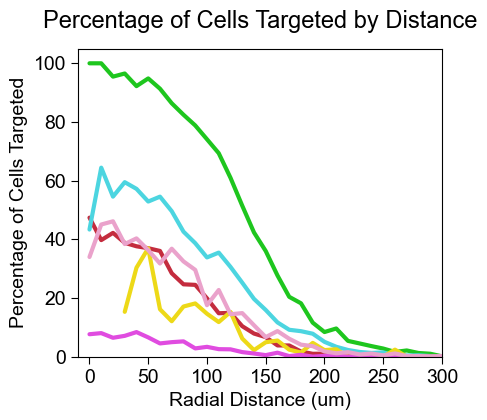

In [60]:
###MET avg histo target vs non-target across all predicted target cell types
### first column
binmin = 0
binmax = 500
binstep = 10
plt.rcParams["figure.figsize"] = (4.7,4)

###get IDs for each predicted MET-type
met8_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-8"]
met8_id = met8_pred["id"]

met4_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-4"]
met4_id = met4_pred["id"]

met6_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-6"]
met6_id = met6_pred["id"]

fig, ax = plt.subplots()
###change metid to plot for each predicted met-type
metid = met8_id
cell_t_list = ['23P', '4P', '5P-IT', '5P-ET', '6P', 'INH']
for k in cell_t_list:
#     print (k)
    new_non= np.zeros(49, int)
    new_total = np.zeros(49, int)
    new_target= np.zeros(49, int)
    new_prob = np.zeros(49, int)
    zeros = np.zeros(49, int)
    for i in metid:
#         print (i)
        single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
        single_cell['cell_type'] = single_cell['cell_type'].str.replace('BC','INH')
        single_cell['cell_type'] = single_cell['cell_type'].str.replace('MC','INH')
        single_cell['cell_type'] = single_cell['cell_type'].str.replace('NGC','INH')
        single_cell['cell_type'] = single_cell['cell_type'].str.replace('BPC','INH')
        single_cell['cell_type'] = single_cell['cell_type'].str.replace('6P-CT','6P')
        single_cell['cell_type'] = single_cell['cell_type'].str.replace('6P-IT','6P')
        single_cell['cell_type'] = single_cell['cell_type'].str.replace('5P-PT','5P-ET')

    ###selelct single cell target type
        single_cell = single_cell.loc[single_cell['cell_type'] == k].copy()
        single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas"]]
        single_cell_sub = single_cell_sub.drop_duplicates()
    ### get soma location of presynaptic cells
        pre_location = md3.loc[md3['pt_root_id'] == i].copy()
        pre_location = pre_location[["pt_root_id", "pt_position"]]
        pre_location = pre_location.rename(columns = {"pt_position": "pre_pt_position"})

    ### get soma location of all target cells
        post_soma = single_cell[["post_pt_root_id", "pt_position"]]
        post_soma = post_soma.rename(columns = {'pt_position': 'post_pt_position'})
        post_soma = post_soma.drop_duplicates(subset = 'post_pt_root_id')
        post_soma = post_soma.assign(pre_pt_root_id = i)

        converge_pre_post = pd.merge(pre_location, post_soma, left_on = 'pt_root_id', right_on = 'pre_pt_root_id', how = 'outer')
    #         ###convert presynaptic and postsynaptic soma coordinates from pixel to um space
        converge_pre_post['pre_x'] = converge_pre_post['pre_pt_position'].map(lambda x: x[0])
        converge_pre_post['pre_x'] = converge_pre_post['pre_x']*.004
        converge_pre_post['pre_y'] = converge_pre_post['pre_pt_position'].map(lambda x: x[1])
        converge_pre_post['pre_y'] = converge_pre_post['pre_y']*.004
        converge_pre_post['pre_z'] = converge_pre_post['pre_pt_position'].map(lambda x: x[2])
        converge_pre_post['pre_z'] = converge_pre_post['pre_z']*.04
        converge_pre_post['post_x'] = converge_pre_post['post_pt_position'].map(lambda x: x[0])
        converge_pre_post['post_x'] = converge_pre_post['post_x']*.004
        converge_pre_post['post_y'] = converge_pre_post['post_pt_position'].map(lambda x: x[1])
        converge_pre_post['post_y'] = converge_pre_post['post_y']*.004
        converge_pre_post['post_z'] = converge_pre_post['post_pt_position'].map(lambda x: x[2])
        converge_pre_post['post_z'] = converge_pre_post['post_z']*.04

        ##calc various distance metrics between somas
        converge_pre_post['distance'] = np.sqrt((converge_pre_post['pre_x']-converge_pre_post['post_x'])**2 + (converge_pre_post['pre_y']-converge_pre_post['post_y'])**2 + (converge_pre_post['pre_z']-converge_pre_post['post_z'])**2)
        converge_pre_post['y_offset'] = np.absolute((converge_pre_post['pre_y']-converge_pre_post['post_y']))
        converge_pre_post['xz_radius'] = np.sqrt((converge_pre_post['pre_x']-converge_pre_post['post_x'])**2 + (converge_pre_post['pre_z']-converge_pre_post['post_z'])**2)
        converge_pre_post['z_offset'] = np.asarray((converge_pre_post['pre_z']-converge_pre_post['post_z']))
#         print ('coverge pre post')
#         print(converge_pre_post.shape)

        soma_x = converge_pre_post['pre_x'].max()
        soma_y = converge_pre_post['pre_y'].max()
        soma_z = converge_pre_post['pre_z'].max()

    #         ####find soma locations for all cells in the dataset
        md3['cell_type'] = md3['cell_type'].str.replace('BC','INH').copy()
        md3['cell_type'] = md3['cell_type'].str.replace('MC','INH')
        md3['cell_type'] = md3['cell_type'].str.replace('NGC','INH')
        md3['cell_type'] = md3['cell_type'].str.replace('BPC','INH')
        md3['cell_type'] = md3['cell_type'].str.replace('6P-CT','6P')
        md3['cell_type'] = md3['cell_type'].str.replace('6P-IT','6P')
        md3['cell_type'] = md3['cell_type'].str.replace('5P-PT','5P-ET')
        md3_onlyk = md3.loc[md3['cell_type'] == k].copy()

        md3_onlyk['pre_x'] = md3_onlyk['pt_position'].map(lambda x: x[0])
        md3_onlyk['pre_x'] = md3_onlyk['pre_x']*.004
        md3_onlyk['pre_y'] = md3_onlyk['pt_position'].map(lambda x: x[1])
        md3_onlyk['pre_y'] = md3_onlyk['pre_y']*.004
        md3_onlyk['pre_z'] = md3_onlyk['pt_position'].map(lambda x: x[2])
        md3_onlyk['pre_z'] = md3_onlyk['pre_z']*.04
        md3_onlyk['i_soma_x'] = soma_x
        md3_onlyk['i_soma_y'] = soma_y
        md3_onlyk['i_soma_z'] = soma_z
        md3_onlyk['counts'] = 0
        md3_onlyk['distance'] = np.sqrt((md3_onlyk['i_soma_x']-md3_onlyk['pre_x'])**2 + (md3_onlyk['i_soma_y']-md3_onlyk['pre_y'])**2 + (md3_onlyk['i_soma_z']-md3_onlyk['pre_z'])**2)
        md3_onlyk['y_offset'] = np.absolute((md3_onlyk['i_soma_y']-md3_onlyk['pre_y']))
        md3_onlyk['xz_radius'] = np.sqrt((md3_onlyk['i_soma_x']-md3_onlyk['pre_x'])**2 + (md3_onlyk['i_soma_z']-md3_onlyk['pre_z'])**2)
        md3_onlyk['z_offset'] = np.asarray((md3_onlyk['i_soma_z']-md3_onlyk['pre_z']))
        md3_onlyk = md3_onlyk.sort_values('distance', ascending = False)


    #         ####binning distance for histogram in 1D
        all_np = md3_onlyk['xz_radius'].to_numpy()
        target_np = converge_pre_post['xz_radius'].to_numpy()
        historange2 = np.arange(binmin,binmax,binstep)

        histtarget, bins4 = np.histogram(target_np, bins = historange2)
        histtotal, bins = np.histogram(all_np, bins = historange2)
        prob_np = np.divide(histtarget, histtotal)
        new_prob = np.vstack((prob_np, new_prob))

    no_of_ids = (len(metid))
    new_prob = np.delete(new_prob, no_of_ids, 0)

    ### calc avg hist

    avg_prob = np.mean(new_prob, axis = 0)
    avg_per = avg_prob*100

    if k == '23P':
        linec = '#C42C3E'
    elif k == '4P':
        linec = '#1EC61E'
    elif k == '5P-IT':
        linec = '#4CD5E0'
    elif k == '5P-ET':
        linec = '#EDD918'
    elif k == '6P':
        linec = '#E04CE0'
    elif k == 'INH':
        linec = '#EAA2CB'
    with plt.style.context('seaborn-white', after_reset = True):
        afont = {'fontname':'Arial'}
       
        ax.plot(bins[:-1], avg_per, label = k, c = linec, linewidth = 3)
        plt.title('Percentage of Cells Targeted by Distance', fontsize = 17, **afont, pad = 15)
        ax.set_xlabel('Radial Distance (um)', fontsize = 14, **afont)
        ax.set_ylabel('Percentage of Cells Targeted', fontsize = 14, **afont)

        ax.set_ylim(ymin=0.0, ymax=105)
        ax.set_xlim(xmin = -10, xmax = 300)
        plt.tick_params(axis='both', length = 5)
        plt.xticks (fontsize = 14, **afont, visible = True)
        plt.yticks (fontsize = 14, **afont)

# plt.savefig('met8_bigbatch_avg_10um_hist_muted_celltype_xz.pdf', bbox_inches = 'tight', facecolor = 'white')


  cell_type  convergent_synapses  pre_pt_root_id      size_x  size_y  \
0       23P                    1    8.646911e+17  336.500000   442.0   
1       23P                    2    8.646911e+17   71.666667   442.0   
2       23P                    3    8.646911e+17   21.500000   442.0   
3       23P                    4    8.646911e+17    7.666667   442.0   
4       23P                    5    8.646911e+17    3.400000   446.2   

     percent       sem  
0  77.400232  2.416846  
1  15.759134  1.065210  
2   4.370920  0.789490  
3   1.627876  0.315807  
4   0.643383  0.205413  


Text(0, 0.5, 'Percentage of Connections')

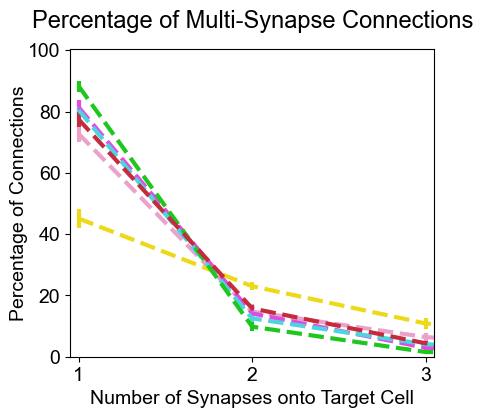

In [61]:
### fourth column -line plot showing number of synapses onto target cell
from matplotlib import figure
afont = {'fontname':'Arial'}
met_id = met6_id
###change isin filter list (from options above (met8_id; met4_id; met6_id))
single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'].isin(met_id)]
single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas"]].copy()

single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('BC','INH')
single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('MC','INH')
single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('NGC','INH')
single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('BPC','INH')
single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('6P-CT','6P')
single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('6P-IT','6P')

##count the number of times the presynaptic cell synapses onto a given postsynaptic cell id
converge_test = single_cell_sub.groupby(['pre_pt_root_id', 'post_pt_root_id', 'cell_type']).size().reset_index(name ='convergent_synapses')

###remove duplicate ids so we only have a single entry for every target cell & sort in descending order
converge_call = converge_test.drop_duplicates()
sorted_converge = converge_test.sort_values(["convergent_synapses"], ascending = False)


##count the number of somas that receive single/double/triple synapses from presynaptic cell onto a given cell type 
converge_group = converge_call.groupby(['pre_pt_root_id','cell_type', 'convergent_synapses'], as_index = False).size()

##sum the total number of somas of a given cell type targeted  = "no_of_somas", here "convegent_synapses" = sum across cell(# of syn * # of somas)
converge_sum = converge_call.groupby(['pre_pt_root_id','cell_type'], as_index = False).size()

###merge df so every pre-syn cell + cell type + # of convergent syn can be divided by total number of L23 targets (for example)
converge_gr_sum = pd.merge (converge_group, converge_sum, left_on = ['pre_pt_root_id', 'cell_type'], right_on = ['pre_pt_root_id', 'cell_type'], how = 'outer')


###here no_of_somas_x = number of L23/L4 targets that receive 1/2/3/4 syn, no_of_somas_y = total number of L23/L4/L5 IT targets
converge_gr_sum_sub = converge_gr_sum[["pre_pt_root_id","cell_type", "convergent_synapses", "size_x", "size_y"]]
converge_gr_sum_sub['percent'] = (converge_gr_sum_sub['size_x']/converge_gr_sum_sub['size_y'])*100


##Average % of somas that are single/double by cell type: here "convergent_synapses_x" = single syn connections/doubles/triples, etc
converge_gr_sum_mean = converge_gr_sum_sub.groupby(['cell_type', 'convergent_synapses'], as_index = False).mean()
converge_gr_sum_sem  = converge_gr_sum_sub.groupby(['cell_type', 'convergent_synapses'], as_index = False).sem()
converge_gr_sum_mean['sem'] = converge_gr_sum_sem['percent']
# converge_gr_sum_mean =converge_gr_sum_mean*100
print (converge_gr_sum_mean.head())

converge_gr_sum_mean23 = converge_gr_sum_mean.loc[converge_gr_sum_mean['cell_type'] == '23P']
converge_gr_sum_mean4 = converge_gr_sum_mean.loc[converge_gr_sum_mean['cell_type'] == '4P']
converge_gr_sum_meanit = converge_gr_sum_mean.loc[converge_gr_sum_mean['cell_type'] == '5P-IT']
converge_gr_sum_meanpt = converge_gr_sum_mean.loc[converge_gr_sum_mean['cell_type'] == '5P-PT']
converge_gr_sum_mean6 = converge_gr_sum_mean.loc[converge_gr_sum_mean['cell_type'] == '6P']
converge_gr_sum_meaninh = converge_gr_sum_mean.loc[converge_gr_sum_mean['cell_type'] == 'INH']


ax = converge_gr_sum_meaninh.plot (x = 'convergent_synapses',y = 'percent', color = "#EAA2CB", yerr = 'sem', label = 'INH', linewidth =3, linestyle='dashed')
converge_gr_sum_mean6.plot (x = 'convergent_synapses',y = 'percent', ax = ax, color = "#E04CE0", yerr = 'sem', label = 'L6', linewidth = 3, linestyle='dashed')
converge_gr_sum_meanpt.plot (x = 'convergent_synapses',y = 'percent', ax = ax, color = "#EDD918", yerr = 'sem', label = 'L5-ET', linewidth = 3, linestyle='dashed')
converge_gr_sum_meanit.plot (x = 'convergent_synapses',y = 'percent', ax = ax, color = "#4CD5E0", yerr = 'sem', label = 'L5-IT', linewidth = 3, linestyle='dashed')
converge_gr_sum_mean4.plot (x = 'convergent_synapses',y = 'percent', ax = ax, color = "#1EC61E", yerr = 'sem', label = 'L4', linewidth = 3 , linestyle='dashed')
converge_gr_sum_mean23.plot (x = 'convergent_synapses', ax = ax, y = 'percent', color = "#C42C3E", yerr = 'sem', label = 'L2/3', linewidth = 3, linestyle='dashed')



# ###non log line graphs
# plt.rcParams["figure.figsize"] = (4.7,4.4)
fig.set_figwidth(4.7)
fig.set_figheight(4.4)
plt.xlim(0.95,3.05)
plt.ylim(0.0,100.5)

plt.xticks ([1, 2, 3],fontsize = 14, **afont)
plt.yticks (fontsize = 14, **afont)
ax.get_legend().remove()
plt.title('Percentage of Multi-Synapse Connections', fontsize = 17, **afont, pad = 15)
plt.xlabel ('Number of Synapses onto Target Cell', fontsize = 14, **afont)
plt.ylabel ('Percentage of Connections', fontsize = 14, labelpad = 0, **afont)
# plt.savefig("Met6_syn_percent_03_bbatch.pdf", bbox_inches = 'tight',facecolor = 'None')

###log line graphs
# plt.yscale('log')
# plt.xlim(1,11.05)
# plt.ylim (0.01, 1)
# plt.rcParams["figure.figsize"] = (6,4.85)
# # plt.legend(fontsize = 17)
# # plt.legend(prop={'family': 'Arial'})
# for axis in ['top','bottom','left','right']:
#     ax.spines[axis].set_linewidth(1.5)
# plt.title('Percentage of Synaptic Divergence', fontsize = 21, **afont, pad = 20)
# plt.xlabel ('Number of Synapses onto Target Cell', fontsize = 17, **afont)
# plt.ylabel ('Percentage of Connections', fontsize = 17, **afont)

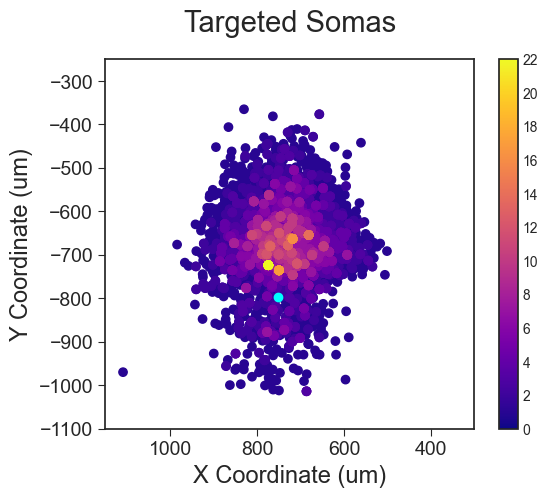

In [62]:
###column 3 - heatmap of target cells color-coded by # of synapes received, cyan soma of presynaptic cell
example_cells = [864691135925834510, 864691136118647832,864691135988665856]
example_cells = [864691135925834510]
for i in example_cells:
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas"]]

    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')

    sorted_converge = converge_call.sort_values(["counts"], ascending = False)
    md3_sub = md3[["pt_root_id","pt_position", "cell_type"]]
    merge_targets = pd.merge(single_cell_sub, md3_sub, left_on = 'post_pt_root_id', right_on = 'pt_root_id', how = 'outer', indicator = True)

    non_target = merge_targets.loc[merge_targets['_merge'] == "right_only"]
    non_target_sub = non_target[["pt_root_id","pt_position"]].copy()

        
        ### get soma location of presynaptic cells
    pre_location = md3.loc[md3['pt_root_id'] == i]
    pre_location = pre_location[["pt_root_id", "pt_position"]]
    pre_location = pre_location.rename(columns = {"pt_position": "pre_pt_position"})
    converge_pre = pd.merge(pre_location, converge_call, left_on = 'pt_root_id', right_on = 'pre_pt_root_id', how = 'inner')


        ### get soma location of all target cells
    post_soma = single_cell[["post_pt_root_id", "pt_position"]]
    post_soma = post_soma.rename(columns = {'pt_position': 'post_pt_position'})
    post_soma = post_soma.drop_duplicates(subset = 'post_pt_root_id')
    converge_pre_post = pd.merge(converge_pre, post_soma, on = 'post_pt_root_id', how = 'inner')

    converge_pre_post['pre_x'] = converge_pre_post['pre_pt_position'].map(lambda x: x[0])
    converge_pre_post['pre_x'] = converge_pre_post['pre_x']*.004
    converge_pre_post['pre_y'] = converge_pre_post['pre_pt_position'].map(lambda x: x[1])
    converge_pre_post['pre_y'] = converge_pre_post['pre_y']*.004
    converge_pre_post['pre_z'] = converge_pre_post['pre_pt_position'].map(lambda x: x[2])
    converge_pre_post['pre_z'] = converge_pre_post['pre_z']*.04
    converge_pre_post['post_x'] = converge_pre_post['post_pt_position'].map(lambda x: x[0])
    converge_pre_post['post_x'] = converge_pre_post['post_x']*.004
    converge_pre_post['post_y'] = converge_pre_post['post_pt_position'].map(lambda x: x[1])
    converge_pre_post['post_y'] = converge_pre_post['post_y']*.004
    converge_pre_post['post_z'] = converge_pre_post['post_pt_position'].map(lambda x: x[2])
    converge_pre_post['post_z'] = converge_pre_post['post_z']*.04
    converge_pre_post['distance'] = np.sqrt((converge_pre_post['pre_x']-converge_pre_post['post_x'])**2 + (converge_pre_post['pre_y']-converge_pre_post['post_y'])**2 + (converge_pre_post['pre_z']-converge_pre_post['post_z'])**2)
    converge_pre_post['y_offset'] = np.absolute((converge_pre_post['pre_y']-converge_pre_post['post_y']))
    converge_pre_post["post_y"] = converge_pre_post["post_y"]*-1
    converge_pre_post["pre_y"] = converge_pre_post["pre_y"]*-1
    single_pre = converge_pre_post.iloc[[0]]
    
    soma_max = (single_pre['pre_z'].max())
    soma_plus = (soma_max + 10)
    soma_minus = (soma_max - 10) 

    xmax =(converge_pre_post['post_x'].max())
    xmin = (converge_pre_post['post_x'].min())

    ymax =(converge_pre_post['post_y'].max())
    ymin = (converge_pre_post['post_y'].min())

    zmax =(converge_pre_post['post_z'].max())
    zmin = (converge_pre_post['post_z'].min())

    non_target_sub['pre_x'] = non_target_sub['pt_position'].map(lambda x: x[0])
    non_target_sub['pre_x'] = non_target_sub['pre_x']*.004
    non_target_sub['pre_y'] = non_target_sub['pt_position'].map(lambda x: x[1])
    non_target_sub['pre_y'] = non_target_sub['pre_y']*.004
    non_target_sub['pre_z'] = non_target_sub['pt_position'].map(lambda x: x[2])
    non_target_sub['pre_z'] = non_target_sub['pre_z']*.04
    non_target_sub["pre_y"] = non_target_sub["pre_y"]*-1

    non_target_sub_sm = non_target_sub.loc[(non_target_sub['pre_x'] < xmax)]
    non_target_sub_sm = non_target_sub_sm.loc[(non_target_sub_sm['pre_x'] > xmin)]
    non_target_sub_sm = non_target_sub_sm.loc[(non_target_sub_sm['pre_y'] < ymax) & (non_target_sub_sm['pre_y'] > ymin)]
    non_target_sub_sm = non_target_sub_sm.loc[(non_target_sub_sm['pre_z'] < zmax) & (non_target_sub_sm['pre_z'] > zmin)]
    converge_pre_post_narrow = converge_pre_post.loc[(converge_pre_post['post_z'] < soma_plus) & (converge_pre_post['post_z'] > soma_minus)]
    converge_pre_post.sort_values('counts', ascending=True, inplace=True)
    with plt.style.context('seaborn-white', after_reset = True):
        afont = {'fontname':'Arial'}
        ax = plt.figure().gca()     

        scatter = ax.scatter(converge_pre_post.post_x , converge_pre_post.post_y, c= converge_pre_post.counts,  cmap = 'plasma', vmin = 0, vmax = 22)

        ax.scatter(single_pre.pre_x, single_pre.pre_y, color='cyan')
        ax.set_aspect('equal')
#         ax.set_xlim(500, 1350)
        ax.set_xlim(300, 1150)
        ax.set_ylim(-1100, -250)
        ax.invert_xaxis()
        plt.tick_params(axis='both', length = 5)
        plt.xticks (fontsize = 14, **afont)
        plt.yticks (fontsize = 14, **afont)
        plt.xlabel('X Coordinate (um)', fontsize = 17, **afont)
        plt.ylabel('Y Coordinate (um)', fontsize = 17, **afont)
        plt.title('Targeted Somas', fontsize = 21, **afont, pad = 20)
        plt.colorbar(scatter, ticks=[0,2, 4,6, 8,10, 12,14, 16,18, 20, 22],ax = ax)
#         plt.savefig("X_Y_scatter_syn_num_title_flipx_same_cbar_eq_{}.png".format(i), bbox_inches = 'tight')
        plt.show()

            



cell target type 23P
percent synapse both 0.00631911532385466
percent synapse basal only 0.10584518167456557
percent synapse apical only 0.8862559241706162
sum apical basal 0.9984202211690364

cell target type 4P
percent synapse both 0.0
percent synapse basal only 0.618421052631579
percent synapse apical only 0.3815789473684211
sum apical basal 1.0

cell target type 5P-IT
percent synapse both 0.15328467153284672
percent synapse basal only 0.7737226277372263
percent synapse apical only 0.072992700729927
sum apical basal 1.0

cell target type 5P-ET
percent synapse both 0.3443396226415094
percent synapse basal only 0.5943396226415094
percent synapse apical only 0.06132075471698113
sum apical basal 1.0

cell target type 6P
percent synapse both 0.10077519379844961
percent synapse basal only 0.8449612403100775
percent synapse apical only 0.05426356589147287
sum apical basal 0.9999999999999999

cell target type INH
percent synapse both 0.1794871794871795
percent synapse basal only 0.68589743

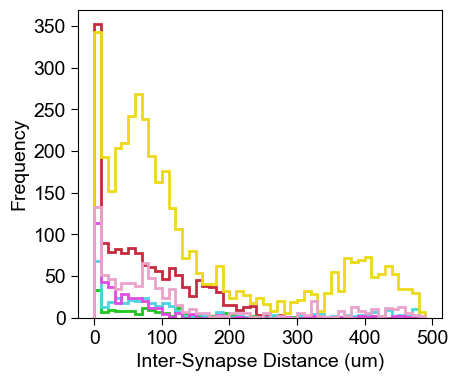

In [66]:
### fourth column -line plot showing number of synapses onto target cell
binmin = 0
binmax = 500
binstep = 10
hist_range = np.arange(binmin,binmax,binstep)
from matplotlib import figure
afont = {'fontname':'Arial'}
# plt.rcParams["figure.figsize"] = (4.5,4.2)
fig.set_figwidth(4.2)
fig.set_figheight(4.5)

met_id = met6_id

cell_t_list = ['23P', '4P', '5P-IT', '5P-ET', '6P', 'INH']

for j in cell_t_list:
    all_syn_dist = []
    all_syn_y_dist = []
    syn_both = []
    syn_basal = []
    syn_apical = []
#     print (j)
    for i in met_id:
#         print (i)
        ###change isin filter list (from options above (met8_id; met4_id; met6_id))
        single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id']==i]
    #     print (single_cell.head())
        single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "ctr_pt_position"]].copy()

        single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('BC','INH')
        single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('MC','INH')
        single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('NGC','INH')
        single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('BPC','INH')
        single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('5P-PT','5P-ET')
        single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('6P-CT','6P')
        single_cell_sub['cell_type'] = single_cell_sub['cell_type'].str.replace('6P-IT','6P')
        single_cell_sub = single_cell_sub.loc[single_cell_sub['cell_type'] == j].copy()
        ##count the number of times the presynaptic cell synapses onto a given postsynaptic cell id
        converge_test = single_cell_sub.groupby(['post_pt_root_id', 'cell_type']).size().reset_index(name ='convergent_synapses')

        converge_test_mult = converge_test.loc[converge_test['convergent_synapses'] > 1]
    #     print (converge_test_mult.head())
        for k in converge_test_mult['post_pt_root_id']:
    #         print (k)
            subset = single_cell_sub.loc[single_cell_sub['post_pt_root_id'] == k].copy()
            subset['pre_x_0'] = subset['ctr_pt_position'].map(lambda x: x[0])
            subset['pre_x'] = subset['pre_x_0']*.004
            subset['pre_y_0'] = subset['ctr_pt_position'].map(lambda x: x[1])
            subset['pre_y'] = subset['pre_y_0']*.004
            subset['pre_z_0'] = subset['ctr_pt_position'].map(lambda x: x[2])
            subset['pre_z'] = subset['pre_z_0']*.04
            
            ####find euclidean distance between synapses onto same target
            subset_coord = subset[['pre_x', 'pre_y', 'pre_z']]
            dist_mat = subset_coord.to_numpy()
            dm = pdist(dist_mat, 'euclidean')
            all_syn_dist = np.append(all_syn_dist , dm)

            ####find y distance between synapses onto same target (same as above just y coord)
            y_subset = subset[['pre_y']]
            dist_y = y_subset.to_numpy()
            dm_y = pdist(dist_y, 'euclidean')
            ### determine whether multi-synapses fall onto both apical and basal dendrites or only one location
            both = False
            basal = False
            apical = False
            for a in dm_y:
                if a > 300:
                    both = True
            if both == False:
                if np.mean(dist_y) > 535:
                    basal = True
                if np.mean(dist_y) < 535: ###535 = average middle y coordinate of L2/3 drawings from jsons
                    apical = True
            syn_both = np.append(syn_both, both)
            syn_basal = np.append(syn_basal, basal)
            syn_apical = np.append(syn_apical, apical)
            all_syn_y_dist = np.append(all_syn_y_dist, dm_y)


###calculate % of synapses onto apical vs basal dendrites
    print ("")
    print ('cell target type', j)
    per_syn_both = (np.sum(syn_both)/ len(syn_both))
    print ('percent synapse both', per_syn_both)
    per_syn_basal = (np.sum(syn_basal)/ len(syn_basal))
    print ('percent synapse basal only', per_syn_basal)
    per_syn_apical = (np.sum(syn_apical)/ len(syn_apical))
    print ('percent synapse apical only', per_syn_apical)
    print ('sum apical basal', (per_syn_apical + per_syn_basal + per_syn_both))
    

####plot histogram of inter-synapse distances
    if j == '23P':
        linec = '#C42C3E'
    elif j == '4P':
        linec = '#1EC61E'
    elif j == '5P-IT':
        linec = '#4CD5E0'
    elif j == '5P-ET':
        linec = '#EDD918'
    elif j == '6P':
        linec = '#E04CE0'
    elif j == 'INH':
        linec = '#EAA2CB'


    ax = plt.hist(all_syn_dist, hist_range, label = j,histtype='step', color = linec, linewidth = 2)
    fig.set_figwidth(4.7)
    fig.set_figheight(4.4)
    plt.tick_params(axis='both', length = 5)
    plt.xticks (fontsize = 14, **afont)
    plt.yticks (fontsize = 14, **afont)
    plt.xlabel('Inter-Synapse Distance (um)', fontsize = 14, **afont)
    plt.ylabel('Frequency', fontsize = 14, **afont)
#     plt.title('Synapse Locations onto a Single Target', fontsize = 21, **afont, pad = 20)

#     plt.savefig("Met4_intersyn_dist_per_target_bbatch.pdf", bbox_inches = 'tight',facecolor = 'white')
    all_syn_dist = []
    all_syn_y_dist = []
    syn_both = []
    syn_basal = []
    syn_apical = []

